--- Successfully loaded CSV_1_2_2_.CSV ---

--- Initial Data ---
  Country/Area Number of foreign visitors  (Unit:1k)  Rank
0      Albania                                 7,105    27
1      Austria                                26,215    10
2      Belgium                                 8,220    25
3     Bulgaria                                 5,557    33
4       Canada                                12,824    18

--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Country/Area                           40 non-null     object
 1   Number of foreign visitors  (Unit:1k)  40 non-null     object
 2   Rank                                   40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB

--- Cleaned and Prepared Data ---
    Country  Visitors_k  Rank  V

/tmp/ipython-input-1700800147.py:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




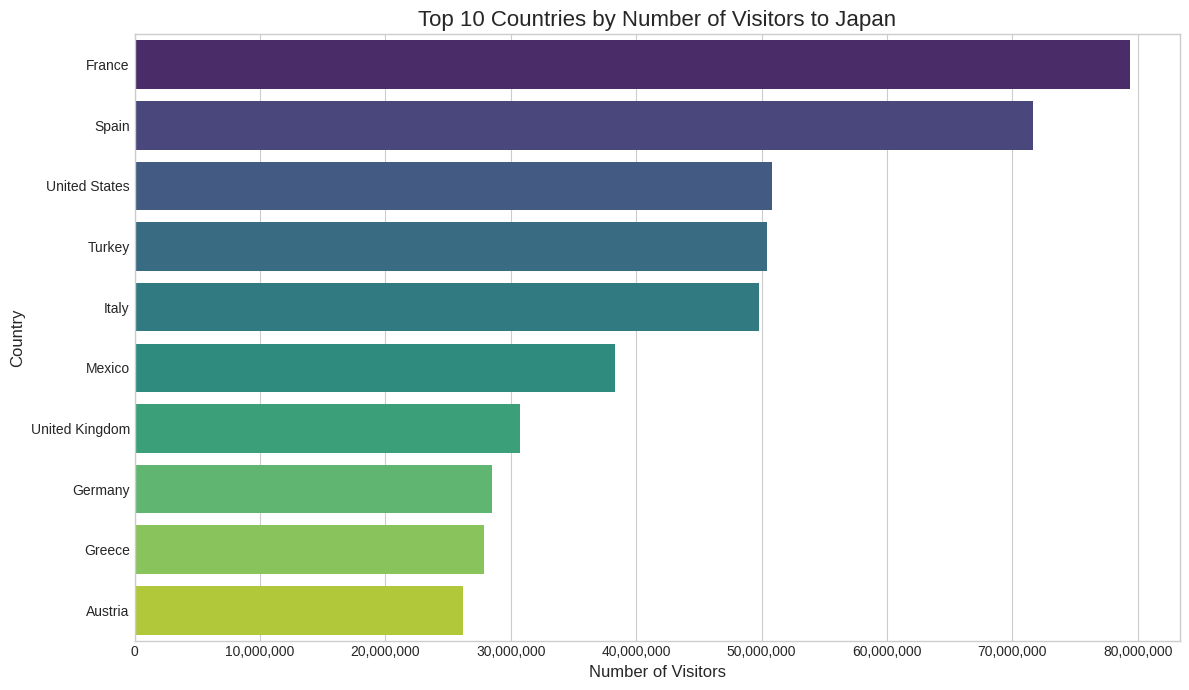

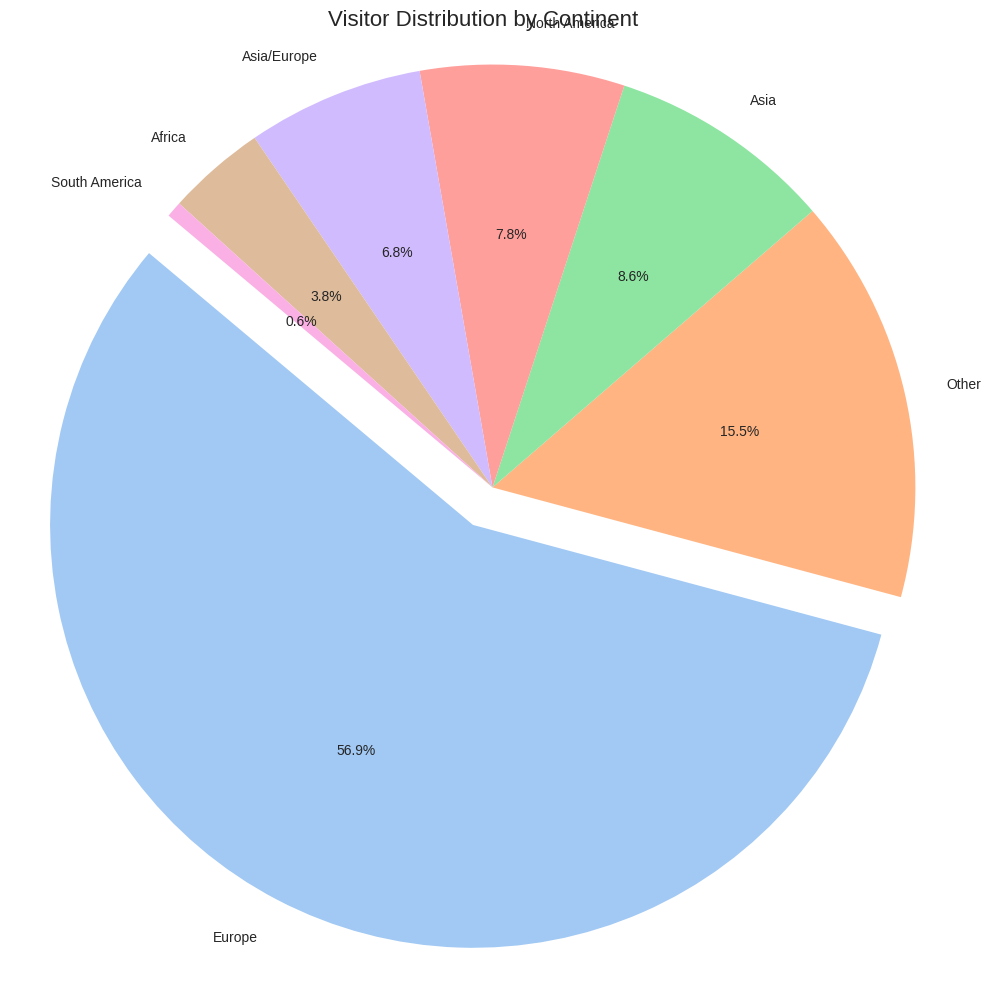


--- Generating Interactive Choropleth Map ---



--- Interactive map saved to 'japan_visitors_map.html' ---

--- Analysis Complete ---


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
try:
    df = pd.read_csv('/content/CSV_1_2_2_.CSV')
    print("--- Successfully loaded CSV_1_2_2_.CSV ---")
except FileNotFoundError:
    print("Error: The file 'CSV_1_2_2_.CSV' was not found.")
    print("Please make sure the file is available.")
    exit()
print("\n--- Initial Data ---")
print(df.head())
print("\n--- Initial Data Info ---")
df.info()
df.rename(columns={
    'Country/Area': 'Country',
    'Number of foreign visitors  (Unit:1k)': 'Visitors_k'
}, inplace=True)

if df['Visitors_k'].dtype == 'object':
    df['Visitors_k'] = df['Visitors_k'].str.replace(',', '', regex=False)

df['Visitors_k'] = pd.to_numeric(df['Visitors_k'], errors='coerce')
df.dropna(subset=['Visitors_k'], inplace=True)
df['Visitors'] = (df['Visitors_k'] * 1000).astype(int)

print("\n--- Cleaned and Prepared Data ---")
print(df.head())
print("\n--- Cleaned Data Info ---")
df.info()
print("\n--- Starting Exploratory Data Analysis ---")
top_10_countries = df.nlargest(10, 'Visitors').set_index('Country')['Visitors']
print("\nTop 10 Countries by Total Visitors:")
print(top_10_countries)

continent_map = {
    'France': 'Europe', 'USA': 'North America', 'Turkey': 'Asia/Europe', 'UK': 'Europe',
    'Italy': 'Europe', 'Mexico': 'North America', 'Sweden': 'Europe', 'Germany': 'Europe',
    'Greece': 'Europe', 'Austria': 'Europe', 'Switzerland': 'Europe', 'Portugal': 'Europe',
    'Saudi Arabia': 'Asia', 'Netherlands': 'Europe', 'Poland': 'Europe', 'Croatia': 'Europe',
    'Denmark': 'Europe', 'Canada': 'North America', 'Hungary': 'Europe', 'Egypt': 'Africa',
    'Thailand': 'Asia', 'Morocco': 'Africa', 'Malaysia': 'Asia', 'Belgium': 'Europe',
    'Dominican Republic': 'North America', 'Albania': 'Europe', 'Kyrgyzstan': 'Asia',
    'Spain': 'Europe', 'Republic of South Africa': 'Africa', 'Bulgaria': 'Europe',
    'Singapore': 'Asia', 'Columbia': 'South America', 'Jordan': 'Asia', 'Iran': 'Asia',
    'Slovenia': 'Europe', 'Norway': 'Europe', 'Indonesia': 'Asia'
}
df['Continent'] = df['Country'].map(continent_map).fillna('Other')
visitors_by_continent = df.groupby('Continent')['Visitors'].sum().sort_values(ascending=False)

print("\nTotal Visitors by Continent:")
print(visitors_by_continent)
print("\n--- Generating Visualizations ---")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Visitors to Japan', fontsize=16)
plt.xlabel('Number of Visitors', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 10))
explode = [0.1 if i == 0 else 0 for i in range(len(visitors_by_continent))]
visitors_by_continent.plot(kind='pie', autopct='%1.1f%%', startangle=140,
                           colors=sns.color_palette('pastel'), explode=explode)
plt.title('Visitor Distribution by Continent', fontsize=16)
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.show()

print("\n--- Generating Interactive Choropleth Map ---")
iso_codes_map = {
    'France': 'FRA', 'USA': 'USA', 'Turkey': 'TUR', 'UK': 'GBR', 'Italy': 'ITA',
    'Mexico': 'MEX', 'Sweden': 'SWE', 'Germany': 'DEU', 'Greece': 'GRC',
    'Austria': 'AUT', 'Switzerland': 'CHE', 'Portugal': 'PRT', 'Saudi Arabia': 'SAU',
    'Netherlands': 'NLD', 'Poland': 'POL', 'Croatia': 'HRV', 'Denmark': 'DNK',
    'Canada': 'CAN', 'Hungary': 'HUN', 'Egypt': 'EGY', 'Thailand': 'THA',
    'Morocco': 'MAR', 'Malaysia': 'MYS', 'Belgium': 'BEL', 'Dominican Republic': 'DOM',
    'Albania': 'ALB', 'Kyrgyzstan': 'KGZ', 'Spain': 'ESP',
    'Republic of South Africa': 'ZAF', 'Bulgaria': 'BGR', 'Singapore': 'SGP',
    'Columbia': 'COL', 'Jordan': 'JOR', 'Iran': 'IRN', 'Slovenia': 'SVN',
    'Norway': 'NOR', 'Indonesia': 'IDN'
}
df['ISO_Code'] = df['Country'].map(iso_codes_map)

fig = px.choropleth(
    data_frame=df,
    locations='ISO_Code',
    color='Visitors',
    hover_name='Country',
    hover_data={'ISO_Code': False, 'Visitors': ':,2f'},
    color_continuous_scale=px.colors.sequential.Plasma,
    title='<b>Global Distribution of Visitors to Japan</b>',
    labels={'Visitors': 'Number of Visitors'}
)

fig.update_layout(
    title_font_size=22,
    title_x=0.5,
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular')
)
fig.update_geos(showcountries=True, countrycolor="LightGrey")

fig.show()
fig.write_html("japan_visitors_map.html")
print("\n--- Interactive map saved to 'japan_visitors_map.html' ---")

print("\n--- Analysis Complete ---")
